# TrendAnumber

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_excel('TrendAnumber.xlsx', 'Sheet1')
df

,tanggal,orig_number,Total_Records,Total_Duration_perSecond
0,2022-06-06,622129265555,25783,0
1,2022-06-06,622180648787,14452,0
2,2022-06-06,622129294688,10374,0
3,2022-06-06,12024558888,3620,0
4,2022-06-06,17147073350,3404,0
...,...,...,...,...
224802,2022-06-06,9647717952537,1,0
224803,2022-06-06,60142450197,1,0
224804,2022-06-06,9619466782,1,0
224805,2022-06-06,60187822715,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224807 entries, 0 to 224806
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   tanggal                   224807 non-null  datetime64[ns]
 1   orig_number               224807 non-null  int64         
 2   Total_Records             224807 non-null  int64         
 3   Total_Duration_perSecond  224807 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.9 MB


In [4]:
df['orig_number'] = df['orig_number'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224807 entries, 0 to 224806
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   tanggal                   224807 non-null  datetime64[ns]
 1   orig_number               224807 non-null  object        
 2   Total_Records             224807 non-null  int64         
 3   Total_Duration_perSecond  224807 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.9+ MB


## orig_number Value Counts

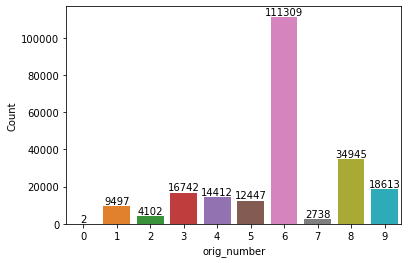

In [5]:
zero = df[df['orig_number'].str.startswith('0')].shape[0]
one = df[df['orig_number'].str.startswith('1')].shape[0]
two = df[df['orig_number'].str.startswith('2')].shape[0]
three = df[df['orig_number'].str.startswith('3')].shape[0]
four = df[df['orig_number'].str.startswith('4')].shape[0]
five = df[df['orig_number'].str.startswith('5')].shape[0]
six = df[df['orig_number'].str.startswith('6')].shape[0]
seven = df[df['orig_number'].str.startswith('7')].shape[0]
eight = df[df['orig_number'].str.startswith('8')].shape[0]
nine = df[df['orig_number'].str.startswith('9')].shape[0]

ax = sns.barplot(x=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], y=[zero, one, two, three, four, five, six, seven, eight, nine], data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('orig_number')
plt.ylabel('Count')
plt.show()

## Total_Records Value Counts

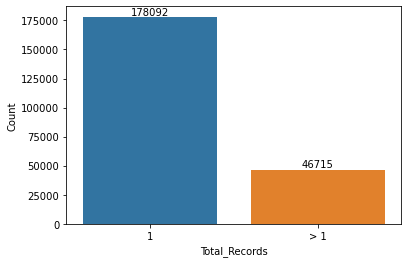

In [6]:
one = df[df['Total_Records'] == 1].shape[0]
more_than_one = df[df['Total_Records'] > 1].shape[0]

ax = sns.barplot(x=['1', '> 1'], y=[one, more_than_one], data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Total_Records')
plt.ylabel('Count')
plt.show()

## Total_Records Distribution

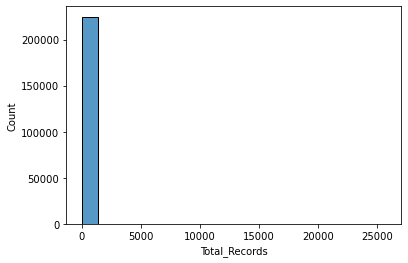

In [7]:
sns.histplot(x='Total_Records', data=df)
plt.show()

## Total_Records Outliers

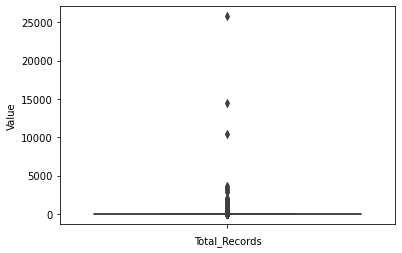

In [8]:
sns.boxplot(y='Total_Records', data=df)
plt.xlabel('Total_Records')
plt.ylabel('Value')
plt.show()

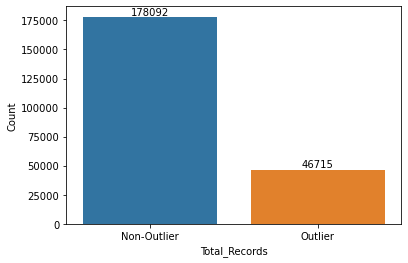

In [9]:
Q1 = df['Total_Records'].quantile(0.25)
Q3 = df['Total_Records'].quantile(0.75)
IQR = Q3 - Q1

outlier = ((df['Total_Records'] < (Q1 - 1.5 * IQR)) | (df['Total_Records'] > (Q3 + 1.5 * IQR))).sum()
non_outlier = df.shape[0] - outlier

ax = sns.barplot(x=['Non-Outlier', 'Outlier'], y=[non_outlier, outlier], data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Total_Records')
plt.ylabel('Count')
plt.show()

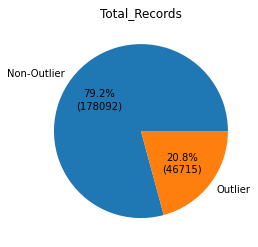

In [10]:
def autopct_format(x):
    return '{:.1f}%\n({:.0f})'.format(x, df.shape[0] * x / 100)

plt.pie([non_outlier, outlier], labels=['Non-Outlier', 'Outlier'], autopct=autopct_format)
plt.title('Total_Records')
plt.show()

## orig_number Duplicates

In [11]:
df.duplicated(subset=['orig_number'])

0         False
1         False
2         False
3         False
4         False
          ...  
224802    False
224803    False
224804    False
224805    False
224806    False
Length: 224807, dtype: bool